# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [3]:
#look at the columns
df.columns


Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [4]:
#get rid of the extra space
df.columns = df.columns.str.strip()

In [5]:
#make the column names lower case
df.columns = df.columns.str.lower()

In [6]:
#check that we got it working right
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

# Change the Index to be the Line Names

In [7]:
#check out the firt few linenames
df.linename.head()

0    NQR456W
1    NQR456W
2    NQR456W
3    NQR456W
4    NQR456W
Name: linename, dtype: object

In [8]:
#change linename to be the new index
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [9]:
# find out how long the dataframe is
print(len(df))

197625


In [10]:
#make a dictionary with a '' key that has a value that is a list that is that long
numerical_index = {'': list(range(len(df)))}


In [11]:
#convert that dictionary into a dataframe
ni = pd.DataFrame(numerical_index)

In [12]:
# set the index to our new version of the original numerical index
df = df.set_index(ni[''])
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
,,,,,,,,,,
0,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [13]:
#create the new Num_Lines column
df["Num_Lines"] = 1

In [14]:
#check to see if it worked
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
,,,,,,,,,,,
0,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,1
1,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,1
2,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,1
3,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,1
4,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,1


In [15]:
#how many unique stations are there?
unique_stations = len(df.station.unique())
unique_stations

373

In [16]:
#show me only the rows with the first unique station

df.loc[df.station == df.station.unique()[0]]

,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
,,,,,,,,,,,
0,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,1
1,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,1
2,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,1
3,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,1
4,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,1
5,A002,R051,02-00-00,59 ST,BMT,08/25/2018,20:00:00,REGULAR,6736562,2283425,1
6,A002,R051,02-00-00,59 ST,BMT,08/26/2018,00:00:00,REGULAR,6736683,2283460,1
7,A002,R051,02-00-00,59 ST,BMT,08/26/2018,04:00:00,REGULAR,6736696,2283461,1
8,A002,R051,02-00-00,59 ST,BMT,08/26/2018,08:00:00,REGULAR,6736705,2283483,1


In [17]:
#show me how many different trains go through that station
df.loc[df.station == df.station.unique()[0]]['c/a'].unique()

array(['A002', 'C021', 'C022', 'R244', 'R244A', 'R245', 'R245A'],
      dtype=object)

In [18]:
#make an empty list to hold the number of unique trains per station
trains_through_station = []

#go through the unique stations one at a time
for train_station in list(range(unique_stations)):
    
    #add the unique list of trains that go through that station to a list
    trains_through_station.append(len(df.loc[df.station == df.station.unique()[train_station]]['c/a'].unique()))
    
    

In [19]:
#check to make sure our values are right
trains_through_station[0:5]

[7, 2, 2, 4, 6]

In [20]:
# reassign those values to be the number of unique trains that go through them
for station in list(range(unique_stations)):
    df.loc[df.station == df.station.unique()[station],'Num_Lines'] = trains_through_station[station]

In [21]:
#check to see if the changes were applied
df.loc[df.station == df.station.unique()[0]].Num_Lines.head()
#this number lines up with our trains_through_station expected value.


0    7
1    7
2    7
3    7
4    7
Name: Num_Lines, dtype: int64

## Write a function to clean a column name.

In [22]:
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'division', 'date', 'time', 'desc',
       'entries', 'exits', 'Num_Lines'],
      dtype='object')

In [23]:
def clean(col_name):
    cleaned = col_name.title()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    
    return cleaned

In [24]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [25]:
#Checking the output, we can see the results.
df.columns

Index(['C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time', 'Desc',
       'Entries', 'Exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [26]:
df.Date.head()


0    08/25/2018
1    08/25/2018
2    08/25/2018
3    08/25/2018
4    08/25/2018
Name: Date, dtype: object

In [27]:
#convert the values of the 'Date' column into datetime structure
df.Date = pd.to_datetime(df.Date)

In [28]:
print(df.Date.dtype)
df.Date.head()

datetime64[ns]



0   2018-08-25
1   2018-08-25
2   2018-08-25
3   2018-08-25
4   2018-08-25
Name: Date, dtype: datetime64[ns]

In [29]:
#add a column named 'Weekday' that gives the number of the day of the week for that date
df['Weekday'] = df.Date.dt.day_name()


In [30]:
df.Weekday.head()


0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: Weekday, dtype: object

In [31]:
#represent days of the week with numbers
days_of_week = df.Weekday.unique()


In [39]:
#make a new column for total train traffic
df['Total_Traffic'] = df.Entries + df.Exits

#make a variable to hold the mean of Total Traffic
daily_mean = int(df.Total_Traffic.mean())

In [33]:
#find the mean Total_Traffic for each day:
day_Mean_Traffic = []
for day in days_of_week:
    print(day + ' has a mean Traffic of ' + str(df[df.Weekday == day].Total_Traffic.mean()) + ' people.')
    day_Mean_Traffic.append(df[df.Weekday == day].Total_Traffic.mean())


Saturday has a mean Traffic of 72921224.00648251 people.
Sunday has a mean Traffic of 76618707.65083152 people.
Monday has a mean Traffic of 71712862.10685213 people.
Tuesday has a mean Traffic of 72485194.23477687 people.
Wednesday has a mean Traffic of 72484703.29851434 people.
Thursday has a mean Traffic of 71832387.09783106 people.
Friday has a mean Traffic of 71777650.81011352 people.


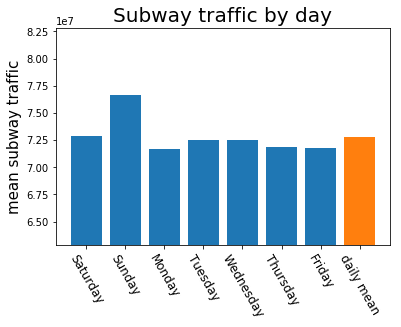

In [34]:
plt.bar(days_of_week,day_Mean_Traffic)
plt.xticks(rotation=-60,fontsize=12)
plt.title('Subway traffic by day',fontsize=20)
plt.ylabel('mean subway traffic',fontsize=15)
plt.ylim(df.Total_Traffic.mean()-10000000,df.Total_Traffic.mean()+10000000)

plt.bar('daily mean',df.Total_Traffic.mean())
plt.show()

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [37]:
weekend_mean = int((day_Mean_Traffic[0] + day_Mean_Traffic[1])/2)
daily_mean = int(df.Total_Traffic.mean())
print('the daily mean traffic is '+ str(daily_mean) +' people. while the weekend mean is '+ 
      str(weekend_mean) + ',\ngiving us a difference of ' + str(weekend_mean - daily_mean) + 
     '. Based on this, I think it\'s reasonable to say that the weekend is busier on average')

the daily mean traffic is 72828733 people. while the weekend mean is 74769965,
giving us a difference of 1941232. Based on this, I think it's reasonable to say that the weekend is busier on average


# Drop a couple of columns

In [ ]:
# Your code here